In [1]:
!pip install -q darts

     |████████████████████████████████| 253 kB 6.9 MB/s 
     |████████████████████████████████| 10.3 MB 50.4 MB/s 
     |████████████████████████████████| 804.1 MB 2.6 kB/s 
     |████████████████████████████████| 65 kB 1.4 MB/s 
     |████████████████████████████████| 9.8 MB 24.7 MB/s 
     |████████████████████████████████| 1.4 MB 58.4 MB/s 
     |████████████████████████████████| 2.0 MB 26.5 MB/s 
     |████████████████████████████████| 788 kB 73.0 MB/s 
     |████████████████████████████████| 9.9 MB 21.4 MB/s 
     |████████████████████████████████| 62 kB 779 kB/s 
     |████████████████████████████████| 177 kB 65.1 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
     |████████████████████████████████| 155 kB 59.8 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 374 kB 51.1 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 214 kB 47.0 MB/s 
ERROR: pip's depende

In [2]:
!pip install -q matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 103 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.12.0 requires matplotlib>=3.4.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [18]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import BlockRNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/airline-passengers.csv')

In [5]:
series = TimeSeries.from_dataframe(df,'Month','Passengers')

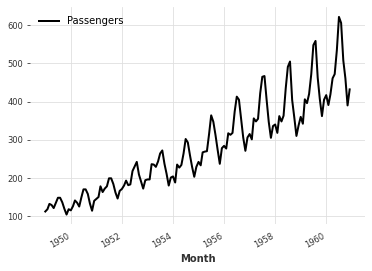

In [6]:
series.plot()

In [14]:
len(train_transformed)

121

In [15]:
# Create training and validation sets:
train, val = series.split_after(pd.Timestamp('19590101'))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [16]:
# create month and year covariate series
year_series = datetime_attribute_timeseries(pd.date_range(start=series.start_time(), freq=series.freq_str, periods=len(train_transformed)),
                                             attribute='year', one_hot=False)
year_series = Scaler().fit_transform(year_series)
month_series = datetime_attribute_timeseries(year_series, attribute='month', one_hot=True)
covariates = year_series.stack(month_series)

In [24]:
my_model = BlockRNNModel(
    model='LSTM',
    input_chunk_length=12,
    output_chunk_length=10,
    n_epochs=300,
    random_state=0
)

In [25]:
my_model.fit(train_transformed,
             past_covariates=covariates,
             verbose=True)

[2021-10-22 04:25:39,486] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 100 samples.
[2021-10-22 04:25:39,486] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 100 samples.
[2021-10-22 04:25:39,494] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-22 04:25:39,494] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|▏         | 4/300 [00:00<00:17, 17.27it/s]

  5%|▍         | 14/300 [00:00<00:16, 17.17it/s]

  8%|▊         | 24/300 [00:01<00:16, 16.79it/s]

 11%|█▏        | 34/300 [00:01<00:15, 17.50it/s]

 15%|█▍        | 44/300 [00:02<00:15, 16.86it/s]

 18%|█▊        | 54/300 [00:03<00:14, 17.47it/s]

 21%|██▏       | 64/300 [00:03<00:14, 16.68it/s]

 25%|██▍       | 74/300 [00:04<00:13, 17.15it/s]

 28%|██▊       | 84/300 [00:04<00:12, 16.98it/s]

 31%|███▏      | 94/300 [00:05<00:12, 16.65it/s]

 35%|███▍      | 104/300 [00:06<00:12, 16.26it/s]

 38%|███▊      | 114/300 [00:06<00:11, 16.58it/s]

 41%|████▏     | 124/300 [00:07<00:10, 16.69it/s]

 45%|████▍     | 134/300 [00:07<00:09, 17.35it/s]

 48%|████▊     | 144/300 [00:08<00:08, 17.45it/s]

 51%|█████▏    | 154/300 [00:09<00:08, 17.65it/s]

 55%|█████▍    | 164/300 [00:09<00:08, 16.57it/s]

 58%|█████▊    | 174/300 [00:10<00:07, 17.08it/s]

 61%|██████▏   | 184/300 [00:10<00:06, 17.48it/s]

 65%|██████▍   | 194/300 [00:11<00:06, 16.96it/s]

 68%|██████▊   | 204/300 [00:11<00:05, 17.64it/s]

 71%|███████▏  | 214/300 [00:12<00:04, 17.27it/s]

 75%|███████▍  | 224/300 [00:13<00:04, 17.20it/s]

 78%|███████▊  | 234/300 [00:13<00:03, 16.73it/s]

 81%|████████▏ | 244/300 [00:14<00:03, 16.37it/s]

 85%|████████▍ | 254/300 [00:14<00:02, 17.35it/s]

 88%|████████▊ | 264/300 [00:15<00:02, 17.30it/s]

 91%|█████████▏| 274/300 [00:16<00:01, 17.52it/s]

 95%|█████████▍| 284/300 [00:16<00:00, 17.68it/s]

 98%|█████████▊| 294/300 [00:17<00:00, 16.38it/s]

100%|██████████| 300/300 [00:17<00:00, 17.03it/s]


In [27]:
predicted = my_model.predict(n=10)

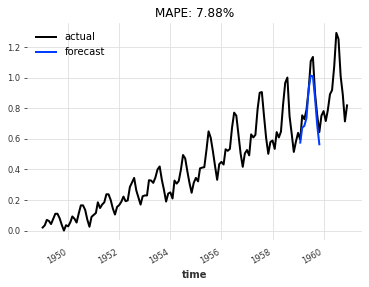

In [28]:
series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed[:11])))
plt.legend()
plt.show()

In [29]:
len(val_transformed)

23